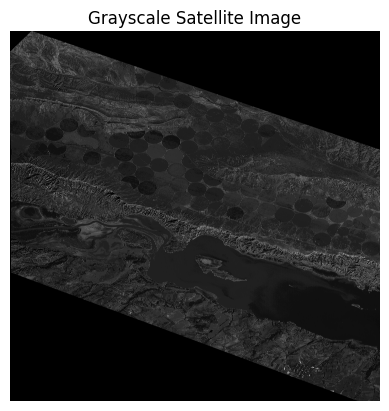

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the satellite image
image = cv2.imread(r"C:\Users\User\Documents\Directory\IMG_SPOT6_PMS_202302140728244_ORT_AKWOI-00082569_R1C1.TIF")
# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Satellite Image')
plt.axis('off')
plt.show()

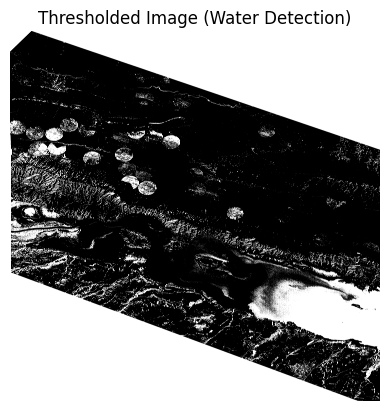

In [10]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Apply a binary threshold to the grayscale image using Otsu's method
_, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image (Water Detection)')
plt.axis('off')
plt.show()

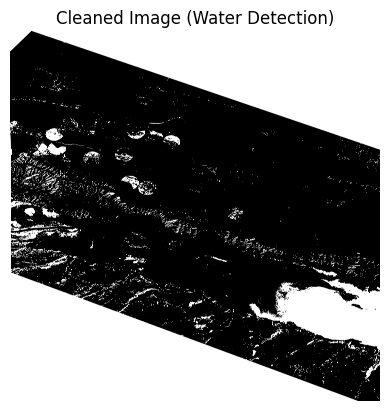

In [11]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply opening (erosion followed by dilation) to remove small noise
opened_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Apply closing (dilation followed by erosion) to close small holes inside the objects
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(closed_image, cmap='gray')
plt.title('Cleaned Image (Water Detection)')
plt.axis('off')
plt.show()

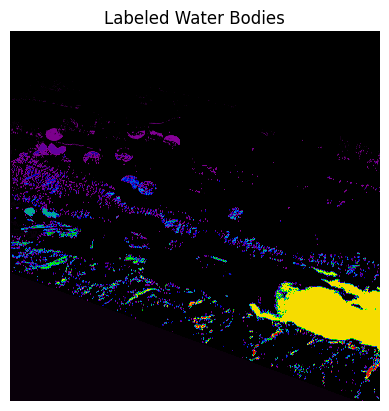

Number of detected water bodies: 5841


In [12]:
from skimage.measure import label,regionprops
# Label connected components
labeled_image = label(closed_image)

# Display the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Water Bodies')
plt.axis('off')
plt.show()

# Count the number of water bodies
num_water_bodies = len(regionprops(labeled_image.astype(int)))
print(f'Number of detected water bodies: {num_water_bodies}')

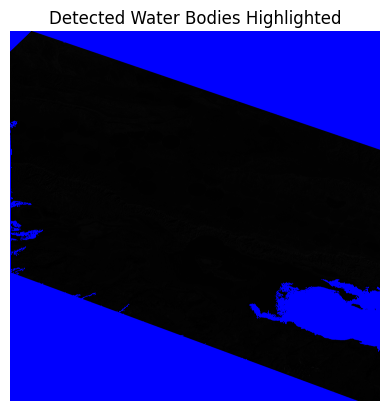

In [13]:
# Ensure labeled_image is of a float or integer type compatible with plt.imshow
labeled_image = labeled_image.astype(np.float32)
# Copy the original image to draw on
imagecopy =cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
min_area_threshold = 300000
# Loop through each detected region and highlight it if it meets the area threshold
for region in regionprops(labeled_image.astype(int)):
    if region.area >= min_area_threshold:
        # Create a mask for the region
        region_mask = np.zeros_like(gray_image)
        for coord in region.coords:
            region_mask[coord[0], coord[1]] = 255
        # Highlight the region on the original image
        imagecopy[region_mask == 255] = [0, 0, 255]  # Highlight with blue color


# Display the image with circles around water bodies
plt.imshow(imagecopy)
plt.title('Detected Water Bodies Highlighted')
plt.axis('off')
plt.show()